# Machine Learning - Regression Strategy

## Loading in the data 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#connect to client
from ib_insync import *
util.startLoop()
ib = IB()

In [3]:
ib.connect('127.0.0.1', 7496)

<IB connected to 127.0.0.1:7496 clientId=1>

In [4]:
ib.reqMarketDataType(1)

In [5]:
# For Foreign exchange
forex_contract = Forex("EURUSD")
forex_contract

Forex('EURUSD', exchange='IDEALPRO')

In [6]:
stream_data = ib.reqHistoricalData(
    forex_contract,
    endDateTime = '', 
    durationStr = '2 Y', 
    barSizeSetting = '1 hour', 
    whatToShow = 'MIDPOINT',
    useRTH = True
)

data = util.df(stream_data)
data["date"]= data["date"].dt.tz_convert(None)
data = data.set_index('date')
data

,open,high,low,close,volume,average,barCount
date,,,,,,,
2021-06-06 21:15:00,1.21635,1.21675,1.21595,1.21650,-1.0,-1.0,-1
2021-06-06 22:00:00,1.21650,1.21675,1.21625,1.21635,-1.0,-1.0,-1
2021-06-06 23:00:00,1.21635,1.21680,1.21630,1.21665,-1.0,-1.0,-1
2021-06-07 00:00:00,1.21665,1.21730,1.21645,1.21675,-1.0,-1.0,-1
2021-06-07 01:00:00,1.21675,1.21675,1.21600,1.21610,-1.0,-1.0,-1
...,...,...,...,...,...,...,...
2023-06-05 02:00:00,1.07015,1.07050,1.06985,1.07000,-1.0,-1.0,-1
2023-06-05 03:00:00,1.07000,1.07045,1.06995,1.07025,-1.0,-1.0,-1
2023-06-05 04:00:00,1.07025,1.07035,1.06965,1.07000,-1.0,-1.0,-1


In [ ]:
stream_data = ib.reqHistoricalData(
    forex_contract,
    endDateTime = '', 
    durationStr = '2 Y', 
    barSizeSetting = '1 hour', 
    whatToShow = 'MIDPOINT',
    useRTH = True
)

In [7]:
ib.disconnect()

## Creating a Multiple Linear Regression Model to Direction of Predict Returns

In [48]:
file = data['close'].to_frame()
file1 = data['close'].to_frame()
file['returns'] = np.log(file["close"].div(file["close"].shift(1)))
file.dropna(inplace = True)
file

,close,returns
date,,
2021-06-06 22:00:00,1.21635,-0.000123
2021-06-06 23:00:00,1.21665,0.000247
2021-06-07 00:00:00,1.21675,0.000082
2021-06-07 01:00:00,1.21610,-0.000534
2021-06-07 02:00:00,1.21630,0.000164
...,...,...
2023-06-05 02:00:00,1.07000,-0.000140
2023-06-05 03:00:00,1.07025,0.000234
2023-06-05 04:00:00,1.07000,-0.000234


In [9]:
lags = 5

In [10]:
columns = []
for lag in range(1, lags+1):
    col = 'lag{}'.format(lag)
    file[col] = file.returns.shift(lag)
    columns.append(col)
file.dropna(inplace = True)
file

,close,returns,lag1,lag2,lag3,lag4,lag5
date,,,,,,,
2021-06-07 03:00:00,1.21675,0.000370,0.000164,-0.000534,0.000082,0.000247,-0.000123
2021-06-07 04:00:00,1.21680,0.000041,0.000370,0.000164,-0.000534,0.000082,0.000247
2021-06-07 05:00:00,1.21580,-0.000822,0.000041,0.000370,0.000164,-0.000534,0.000082
2021-06-07 06:00:00,1.21525,-0.000452,-0.000822,0.000041,0.000370,0.000164,-0.000534
2021-06-07 07:00:00,1.21680,0.001275,-0.000452,-0.000822,0.000041,0.000370,0.000164
...,...,...,...,...,...,...,...
2023-06-05 02:00:00,1.07000,-0.000140,0.000701,-0.000280,-0.000421,-0.000607,0.000000
2023-06-05 03:00:00,1.07025,0.000234,-0.000140,0.000701,-0.000280,-0.000421,-0.000607
2023-06-05 04:00:00,1.07000,-0.000234,0.000234,-0.000140,0.000701,-0.000280,-0.000421


In [11]:
# Create trainining, validation / test split based on the following numbers --> 70% for training, 20% for validation and 10% for test split
train_split, test_split = 0.7, 0.3

index = int(train_split * len(file))
train = file[:index].copy()
test = file[index:].copy()

In [12]:
train

,close,returns,lag1,lag2,lag3,lag4,lag5
date,,,,,,,
2021-06-07 03:00:00,1.21675,0.000370,0.000164,-0.000534,0.000082,0.000247,-0.000123
2021-06-07 04:00:00,1.21680,0.000041,0.000370,0.000164,-0.000534,0.000082,0.000247
2021-06-07 05:00:00,1.21580,-0.000822,0.000041,0.000370,0.000164,-0.000534,0.000082
2021-06-07 06:00:00,1.21525,-0.000452,-0.000822,0.000041,0.000370,0.000164,-0.000534
2021-06-07 07:00:00,1.21680,0.001275,-0.000452,-0.000822,0.000041,0.000370,0.000164
...,...,...,...,...,...,...,...
2022-10-27 04:00:00,1.00705,0.000099,0.000248,-0.000894,-0.000248,-0.001487,0.001338
2022-10-27 05:00:00,1.00770,0.000645,0.000099,0.000248,-0.000894,-0.000248,-0.001487
2022-10-27 06:00:00,1.00570,-0.001987,0.000645,0.000099,0.000248,-0.000894,-0.000248


In [13]:
lm = LinearRegression(fit_intercept = True)
lm.fit(train[columns], train['returns'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lm.coef_

array([-0.03139621, -0.00686748, -0.006956  , -0.01305139,  0.01251571])

In [15]:
train['pred'] = lm.predict(train[columns].values)
train['pred'] = np.sign(train.pred)
train

,close,returns,lag1,lag2,lag3,lag4,lag5,pred
date,,,,,,,,
2021-06-07 03:00:00,1.21675,0.000370,0.000164,-0.000534,0.000082,0.000247,-0.000123,-1.0
2021-06-07 04:00:00,1.21680,0.000041,0.000370,0.000164,-0.000534,0.000082,0.000247,-1.0
2021-06-07 05:00:00,1.21580,-0.000822,0.000041,0.000370,0.000164,-0.000534,0.000082,-1.0
2021-06-07 06:00:00,1.21525,-0.000452,-0.000822,0.000041,0.000370,0.000164,-0.000534,-1.0
2021-06-07 07:00:00,1.21680,0.001275,-0.000452,-0.000822,0.000041,0.000370,0.000164,-1.0
...,...,...,...,...,...,...,...,...
2022-10-27 04:00:00,1.00705,0.000099,0.000248,-0.000894,-0.000248,-0.001487,0.001338,1.0
2022-10-27 05:00:00,1.00770,0.000645,0.000099,0.000248,-0.000894,-0.000248,-0.001487,-1.0
2022-10-27 06:00:00,1.00570,-0.001987,0.000645,0.000099,0.000248,-0.000894,-0.000248,-1.0


In [16]:
train['pred'].value_counts()

-1.0    6841
 1.0    1874
Name: pred, dtype: int64

In [17]:
hits = np.sign(train['returns'] * train['pred']).value_counts()
hits

 1.0    4392
-1.0    4058
 0.0     265
dtype: int64

In [18]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5039586919104991

## Backtesting

In [19]:
train['strategy'] = train['pred']*train['returns']
train['creturns'] = train['returns'].cumsum().apply(np.exp)
train['cstrategy'] = train['strategy'].cumsum().apply(np.exp)
train

,close,returns,lag1,lag2,lag3,lag4,lag5,pred,strategy,creturns,cstrategy
date,,,,,,,,,,,
2021-06-07 03:00:00,1.21675,0.000370,0.000164,-0.000534,0.000082,0.000247,-0.000123,-1.0,-0.000370,1.000370,0.999630
2021-06-07 04:00:00,1.21680,0.000041,0.000370,0.000164,-0.000534,0.000082,0.000247,-1.0,-0.000041,1.000411,0.999589
2021-06-07 05:00:00,1.21580,-0.000822,0.000041,0.000370,0.000164,-0.000534,0.000082,-1.0,0.000822,0.999589,1.000411
2021-06-07 06:00:00,1.21525,-0.000452,-0.000822,0.000041,0.000370,0.000164,-0.000534,-1.0,0.000452,0.999137,1.000864
2021-06-07 07:00:00,1.21680,0.001275,-0.000452,-0.000822,0.000041,0.000370,0.000164,-1.0,-0.001275,1.000411,0.999589
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27 04:00:00,1.00705,0.000099,0.000248,-0.000894,-0.000248,-0.001487,0.001338,1.0,0.000099,0.827962,1.221476
2022-10-27 05:00:00,1.00770,0.000645,0.000099,0.000248,-0.000894,-0.000248,-0.001487,-1.0,-0.000645,0.828496,1.220688
2022-10-27 06:00:00,1.00570,-0.001987,0.000645,0.000099,0.000248,-0.000894,-0.000248,-1.0,0.001987,0.826852,1.223116


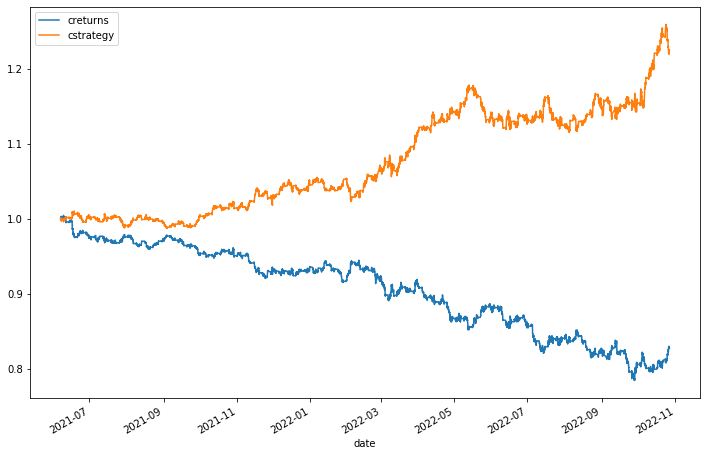

In [20]:
train[['creturns', 'cstrategy']].plot(figsize = (12,8))

In [21]:
train['trades'] = train.pred.diff().fillna(0).abs()
train['trades'].value_counts()

0.0    6157
2.0    2558
Name: trades, dtype: int64

In [22]:
train

,close,returns,lag1,lag2,lag3,lag4,lag5,pred,strategy,creturns,cstrategy,trades
date,,,,,,,,,,,,
2021-06-07 03:00:00,1.21675,0.000370,0.000164,-0.000534,0.000082,0.000247,-0.000123,-1.0,-0.000370,1.000370,0.999630,0.0
2021-06-07 04:00:00,1.21680,0.000041,0.000370,0.000164,-0.000534,0.000082,0.000247,-1.0,-0.000041,1.000411,0.999589,0.0
2021-06-07 05:00:00,1.21580,-0.000822,0.000041,0.000370,0.000164,-0.000534,0.000082,-1.0,0.000822,0.999589,1.000411,0.0
2021-06-07 06:00:00,1.21525,-0.000452,-0.000822,0.000041,0.000370,0.000164,-0.000534,-1.0,0.000452,0.999137,1.000864,0.0
2021-06-07 07:00:00,1.21680,0.001275,-0.000452,-0.000822,0.000041,0.000370,0.000164,-1.0,-0.001275,1.000411,0.999589,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27 04:00:00,1.00705,0.000099,0.000248,-0.000894,-0.000248,-0.001487,0.001338,1.0,0.000099,0.827962,1.221476,2.0
2022-10-27 05:00:00,1.00770,0.000645,0.000099,0.000248,-0.000894,-0.000248,-0.001487,-1.0,-0.000645,0.828496,1.220688,2.0
2022-10-27 06:00:00,1.00570,-0.001987,0.000645,0.000099,0.000248,-0.000894,-0.000248,-1.0,0.001987,0.826852,1.223116,0.0


## Forwardtesting

In [23]:
test['pred'] = lm.predict(test[columns].values)
test

,close,returns,lag1,lag2,lag3,lag4,lag5,pred
date,,,,,,,,
2022-10-27 09:00:00,1.00380,-0.002239,-0.000596,0.000944,-0.001987,0.000645,0.000099,-0.000004
2022-10-27 10:00:00,1.00360,-0.000199,-0.002239,-0.000596,0.000944,-0.001987,0.000645,0.000079
2022-10-27 11:00:00,1.00500,0.001394,-0.000199,-0.002239,-0.000596,0.000944,-0.001987,-0.000034
2022-10-27 12:00:00,1.00070,-0.004288,0.001394,-0.000199,-0.002239,-0.000596,0.000944,-0.000030
2022-10-27 13:00:00,1.00060,-0.000100,-0.004288,0.001394,-0.000199,-0.002239,-0.000596,0.000125
...,...,...,...,...,...,...,...,...
2023-06-05 02:00:00,1.07000,-0.000140,0.000701,-0.000280,-0.000421,-0.000607,0.000000,-0.000032
2023-06-05 03:00:00,1.07025,0.000234,-0.000140,0.000701,-0.000280,-0.000421,-0.000607,-0.000023
2023-06-05 04:00:00,1.07000,-0.000234,0.000234,-0.000140,0.000701,-0.000280,-0.000421,-0.000036


In [24]:
test['pred'] = np.sign(test['pred'])
test['pred'].value_counts()

-1.0    2866
 1.0     869
Name: pred, dtype: int64

In [25]:
hits2 = np.sign(train['returns'] * train['pred']).value_counts()
hits2

 1.0    4392
-1.0    4058
 0.0     265
dtype: int64

In [26]:
hit_ratio2 = hits2[1.0] / sum(hits2)
hit_ratio2

0.5039586919104991

In [27]:
test['strategy'] = test['pred']*test['returns']
test['creturns'] = test['returns'].cumsum().apply(np.exp)
test['cstrategy'] = test['strategy'].cumsum().apply(np.exp)
test

,close,returns,lag1,lag2,lag3,lag4,lag5,pred,strategy,creturns,cstrategy
date,,,,,,,,,,,
2022-10-27 09:00:00,1.00380,-0.002239,-0.000596,0.000944,-0.001987,0.000645,0.000099,-1.0,0.002239,0.997764,1.002241
2022-10-27 10:00:00,1.00360,-0.000199,-0.002239,-0.000596,0.000944,-0.001987,0.000645,1.0,-0.000199,0.997565,1.002042
2022-10-27 11:00:00,1.00500,0.001394,-0.000199,-0.002239,-0.000596,0.000944,-0.001987,-1.0,-0.001394,0.998956,1.000646
2022-10-27 12:00:00,1.00070,-0.004288,0.001394,-0.000199,-0.002239,-0.000596,0.000944,-1.0,0.004288,0.994682,1.004946
2022-10-27 13:00:00,1.00060,-0.000100,-0.004288,0.001394,-0.000199,-0.002239,-0.000596,1.0,-0.000100,0.994583,1.004845
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-05 02:00:00,1.07000,-0.000140,0.000701,-0.000280,-0.000421,-0.000607,0.000000,-1.0,0.000140,1.063565,1.046682
2023-06-05 03:00:00,1.07025,0.000234,-0.000140,0.000701,-0.000280,-0.000421,-0.000607,-1.0,-0.000234,1.063814,1.046437
2023-06-05 04:00:00,1.07000,-0.000234,0.000234,-0.000140,0.000701,-0.000280,-0.000421,-1.0,0.000234,1.063565,1.046682


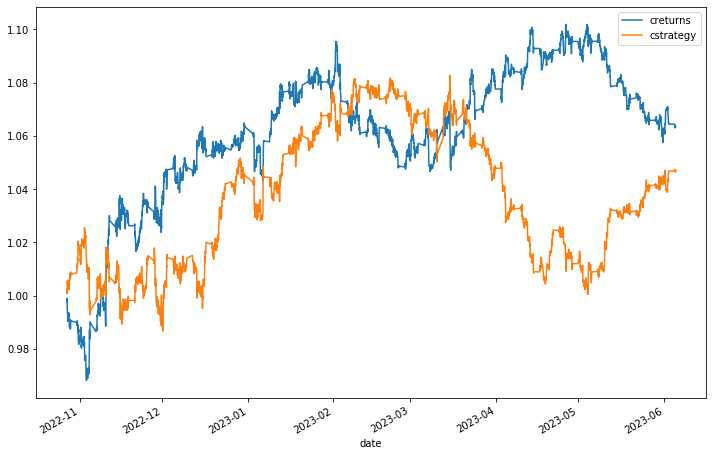

In [28]:
test[['creturns', 'cstrategy']].plot(figsize = (12,8))

In [29]:
test['trades'] = test.pred.diff().fillna(0).abs()
test['trades'].value_counts()

0.0    2539
2.0    1196
Name: trades, dtype: int64

## Creating a Generalised model
### Using Logistic Regression - to allow regularisation and operating through many iterations

In [1]:
class MLBacktester():
    ''' Class for the vectorized backtesting of Machine Learning-based trading strategies (Classification).
    '''

    def __init__(self, symbol, start, end, tc):
        '''
        Parameters
        ----------
        symbol: str
            ticker symbol (instrument) to be backtested
        start: str
            start date for data import
        end: str
            end date for data import
        tc: float
            proportional transaction/trading costs per trade
        '''
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.model = LogisticRegression(C = 1e6, max_iter = 100000, multi_class = "ovr")
        self.results = None
        self.get_data()
    
    def __repr__(self):
        rep = "MLBacktester(symbol = {}, start = {}, end = {}, tc = {})"
        return rep.format(self.symbol, self.start, self.end, self.tc)
                             
    def get_data(self):
        ''' Imports the data (source can be changed).
        '''
        raw = file1
        raw = raw.dropna()
        raw = raw.loc[self.start:self.end]
        raw["returns"] = np.log(raw / raw.shift(1))
        self.data = raw
                             
    def split_data(self, start, end):
        ''' Splits the data into training set & test set.
        '''
        data = self.data.loc[start:end].copy()
        return data
    
    def prepare_features(self, start, end):
        ''' Prepares the feature columns for training set and test set.
        '''
        self.data_subset = self.split_data(start, end)
        self.feature_columns = []
        for lag in range(1, self.lags + 1):
            col = "lag{}".format(lag)
            self.data_subset[col] = self.data_subset["returns"].shift(lag)
            self.feature_columns.append(col)
        self.data_subset.dropna(inplace=True)
        
    def fit_model(self, start, end):
        ''' Fitting the ML Model.
        '''
        self.prepare_features(start, end)
        self.model.fit(self.data_subset[self.feature_columns], np.sign(self.data_subset["returns"]))
        
    def test_strategy(self, train_ratio = 0.7, lags = 5):
        ''' 
        Backtests the ML-based strategy.
        
        Parameters
        ----------
        train_ratio: float (between 0 and 1.0 excl.)
            Splitting the dataset into training set (train_ratio) and test set (1 - train_ratio).
        lags: int
            number of lags serving as model features.
        '''
        self.lags = lags
                  
        # determining datetime for start, end and split (for training an testing period)
        full_data = self.data.copy()
        split_index = int(len(full_data) * train_ratio)
        split_date = full_data.index[split_index-1]
        train_start = full_data.index[0]
        test_end = full_data.index[-1]
        
        # fit the model on the training set
        self.fit_model(train_start, split_date)
        
        # prepare the test set
        self.prepare_features(split_date, test_end)
                  
        # make predictions on the test set
        predict = self.model.predict(self.data_subset[self.feature_columns])
        self.data_subset["pred"] = predict
        
        # calculate Strategy Returns
        self.data_subset["strategy"] = self.data_subset["pred"] * self.data_subset["returns"]
        
        # determine the number of trades in each bar
        self.data_subset["trades"] = self.data_subset["pred"].diff().fillna(0).abs()
        
        # subtract transaction/trading costs from pre-cost return
        self.data_subset.strategy = self.data_subset.strategy - self.data_subset.trades * self.tc
        
        # calculate cumulative returns for strategy & buy and hold
        self.data_subset["creturns"] = self.data_subset["returns"].cumsum().apply(np.exp)
        self.data_subset["cstrategy"] = self.data_subset['strategy'].cumsum().apply(np.exp)
        self.results = self.data_subset
        
        perf = self.results["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - self.results["creturns"].iloc[-1] # out-/underperformance of strategy
        
        return round(perf, 6), round(outperf, 6)
        
    def plot_results(self):
        ''' Plots the performance of the trading strategy and compares to "buy and hold".
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "Logistic Regression: {} | TC = {}".format(self.symbol, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))

In [4]:
model = MLBacktester("EURUSD", "2022-10-27", "2023-06-05", 0.00007)

NameError: name 'LogisticRegression' is not defined

In [3]:
model

NameError: name 'model' is not defined

In [80]:
model.data

,close,returns
date,,
2022-10-27 00:00:00,1.00785,NaN
2022-10-27 01:00:00,1.00760,-0.000248
2022-10-27 02:00:00,1.00670,-0.000894
2022-10-27 03:00:00,1.00695,0.000248
2022-10-27 04:00:00,1.00705,0.000099
...,...,...
2023-06-05 02:00:00,1.07000,-0.000140
2023-06-05 03:00:00,1.07025,0.000234
2023-06-05 04:00:00,1.07000,-0.000234


In [81]:
model.test_strategy(train_ratio=0.7, lags=5)

(0.95319, -0.030126)

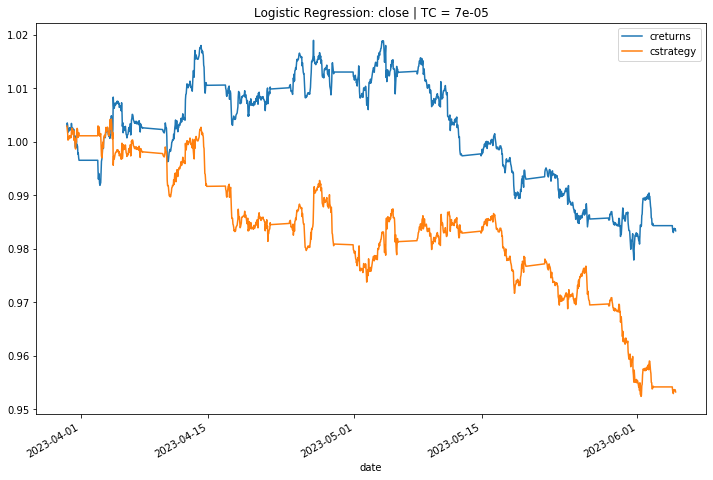

In [82]:
model.plot_results()

### To find optimal number of lags

In [83]:
for lags in range(1,25):
    print(lags, model.test_strategy(train_ratio = 0.7, lags = lags))

1 (0.958579, -0.026911)
2 (0.948437, -0.035377)
3 (0.94053, -0.044462)
4 (0.920985, -0.062331)
5 (0.95319, -0.030126)
6 (0.945607, -0.034871)
7 (0.944539, -0.035355)
8 (0.925022, -0.055276)
9 (0.919219, -0.062384)
10 (0.937733, -0.043239)
11 (0.937685, -0.043737)
12 (0.943287, -0.03764)
13 (0.94204, -0.038753)
14 (0.936688, -0.044239)
15 (0.909453, -0.071384)
16 (0.913105, -0.068092)
17 (0.915697, -0.065365)
18 (0.911832, -0.068152)
19 (0.918922, -0.06178)
20 (0.917637, -0.06311)
21 (0.910516, -0.070276)
22 (0.937465, -0.043641)
23 (0.944839, -0.036988)
24 (0.928005, -0.053057)


Too many trades eating up costs, can be tried with different data frequency to see predictive power